# Credit Card Fraud Detection

<img src="image.png" width="480" height="300"><br>
The data set contains transactions made by credit cards in September 2013 by European cardholders. It consists of transactions that occured in 2 days, where 492 of the transactions are fraud, out of 284 807 transactions.
- The dataset is highly imbalanced.

- The data set contains only numerical input values which are the result of a PCA transformation. Unfortunately due to confidentiality issues, more background information about the data and the original features cannot be provided. 
-  Features V1, V2 up to V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- 'Time' contains the seconds elapsed between each transaction and the first transaction in the data set. 'Amount' is the transaction amount, 'Class' is the response variable and it takes values `1 in case of fraud` and `0 otherwise`.
- Given the class imbalance ratio, we recommend measuring the accuracy using the area under the precision recall Kev AUPRC. Confusion matrix accuracy is not meaningful for an unbalanced classification.



**More Information About PCA**:

    Dimensionality Reduction: One of the main benefits of PCA is that it reduces the number of dimensions in the data, making it easier to visualize and analyze. This can help to remove noise and redundant information from the data, which can improve the accuracy and efficiency of subsequent analysis.

    Decorrelation: PCA transforms the original features into uncorrelated variables, which can be useful for removing collinearity from the data. This is important because collinearity can cause problems in many statistical methods, such as regression analysis.

    Data Visualization: PCA can be used to create two-dimensional scatter plots of high-dimensional data, which can help to identify patterns and relationships in the data that might not be immediately apparent.

    Data Compression: By retaining only the most important principal components, PCA can be used as a form of data compression, allowing large datasets to be stored and analyzed more efficiently.

    Improved Model Performance: In some cases, using the principal components of a dataset as predictors in a machine learning model can improve the performance of the model compared to using the original features. This is because the principal components can capture the most important patterns in the data, and removing redundant information can reduce the risk of overfitting.

### Importing Modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE

pd.options.display.max_columns = None   # so that we can see all columns by scrolling

### Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()   # displaying the 1st 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.shape   # viwing the shape of the dataframe

(284807, 31)

In [5]:
df.Class.value_counts()   # to view the value counts of each Class

0    284315
1       492
Name: Class, dtype: int64

- The total number of rows is 284 807, and we have 31 columns
- The average transaction amount is 88 Euros.
- The maximum transaction amount is 25 691 Euros.
- There are 492 fraudulent transactions and 284 315 non-fraudulent transactions.
- NB: The amount and time columns will need to be standardized because the difference of the values within these columns is large. This will be done later.

In [6]:
df.isnull().sum()   # checking if our data has null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The data does not contain any null values

In [7]:
df.info()   # viewing the data types of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All columns have numerical data

### Checking if the data has duplicate rows

In [8]:
df.duplicated().sum()

1081

We have 1081 duplicate rows. These duplicate rows will be dropped later.

In [9]:
dups = df.duplicated()
df[dups]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


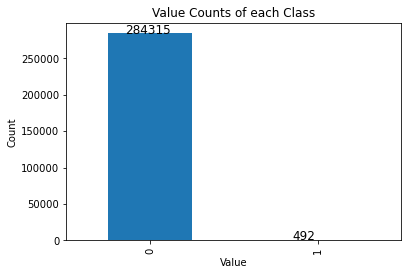

In [10]:
value_counts = df['Class'].value_counts()
# Plot the value counts as a bar chart
value_counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Counts of each Class')

# To show the actual value counts on the plot
for i in range(len(value_counts)):
    plt.text(x = i-0.15, y = value_counts[i]+0.5, s = value_counts[i], size = 12)

# Show the plot
plt.show()

In [11]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### To display the ranges for all the columns

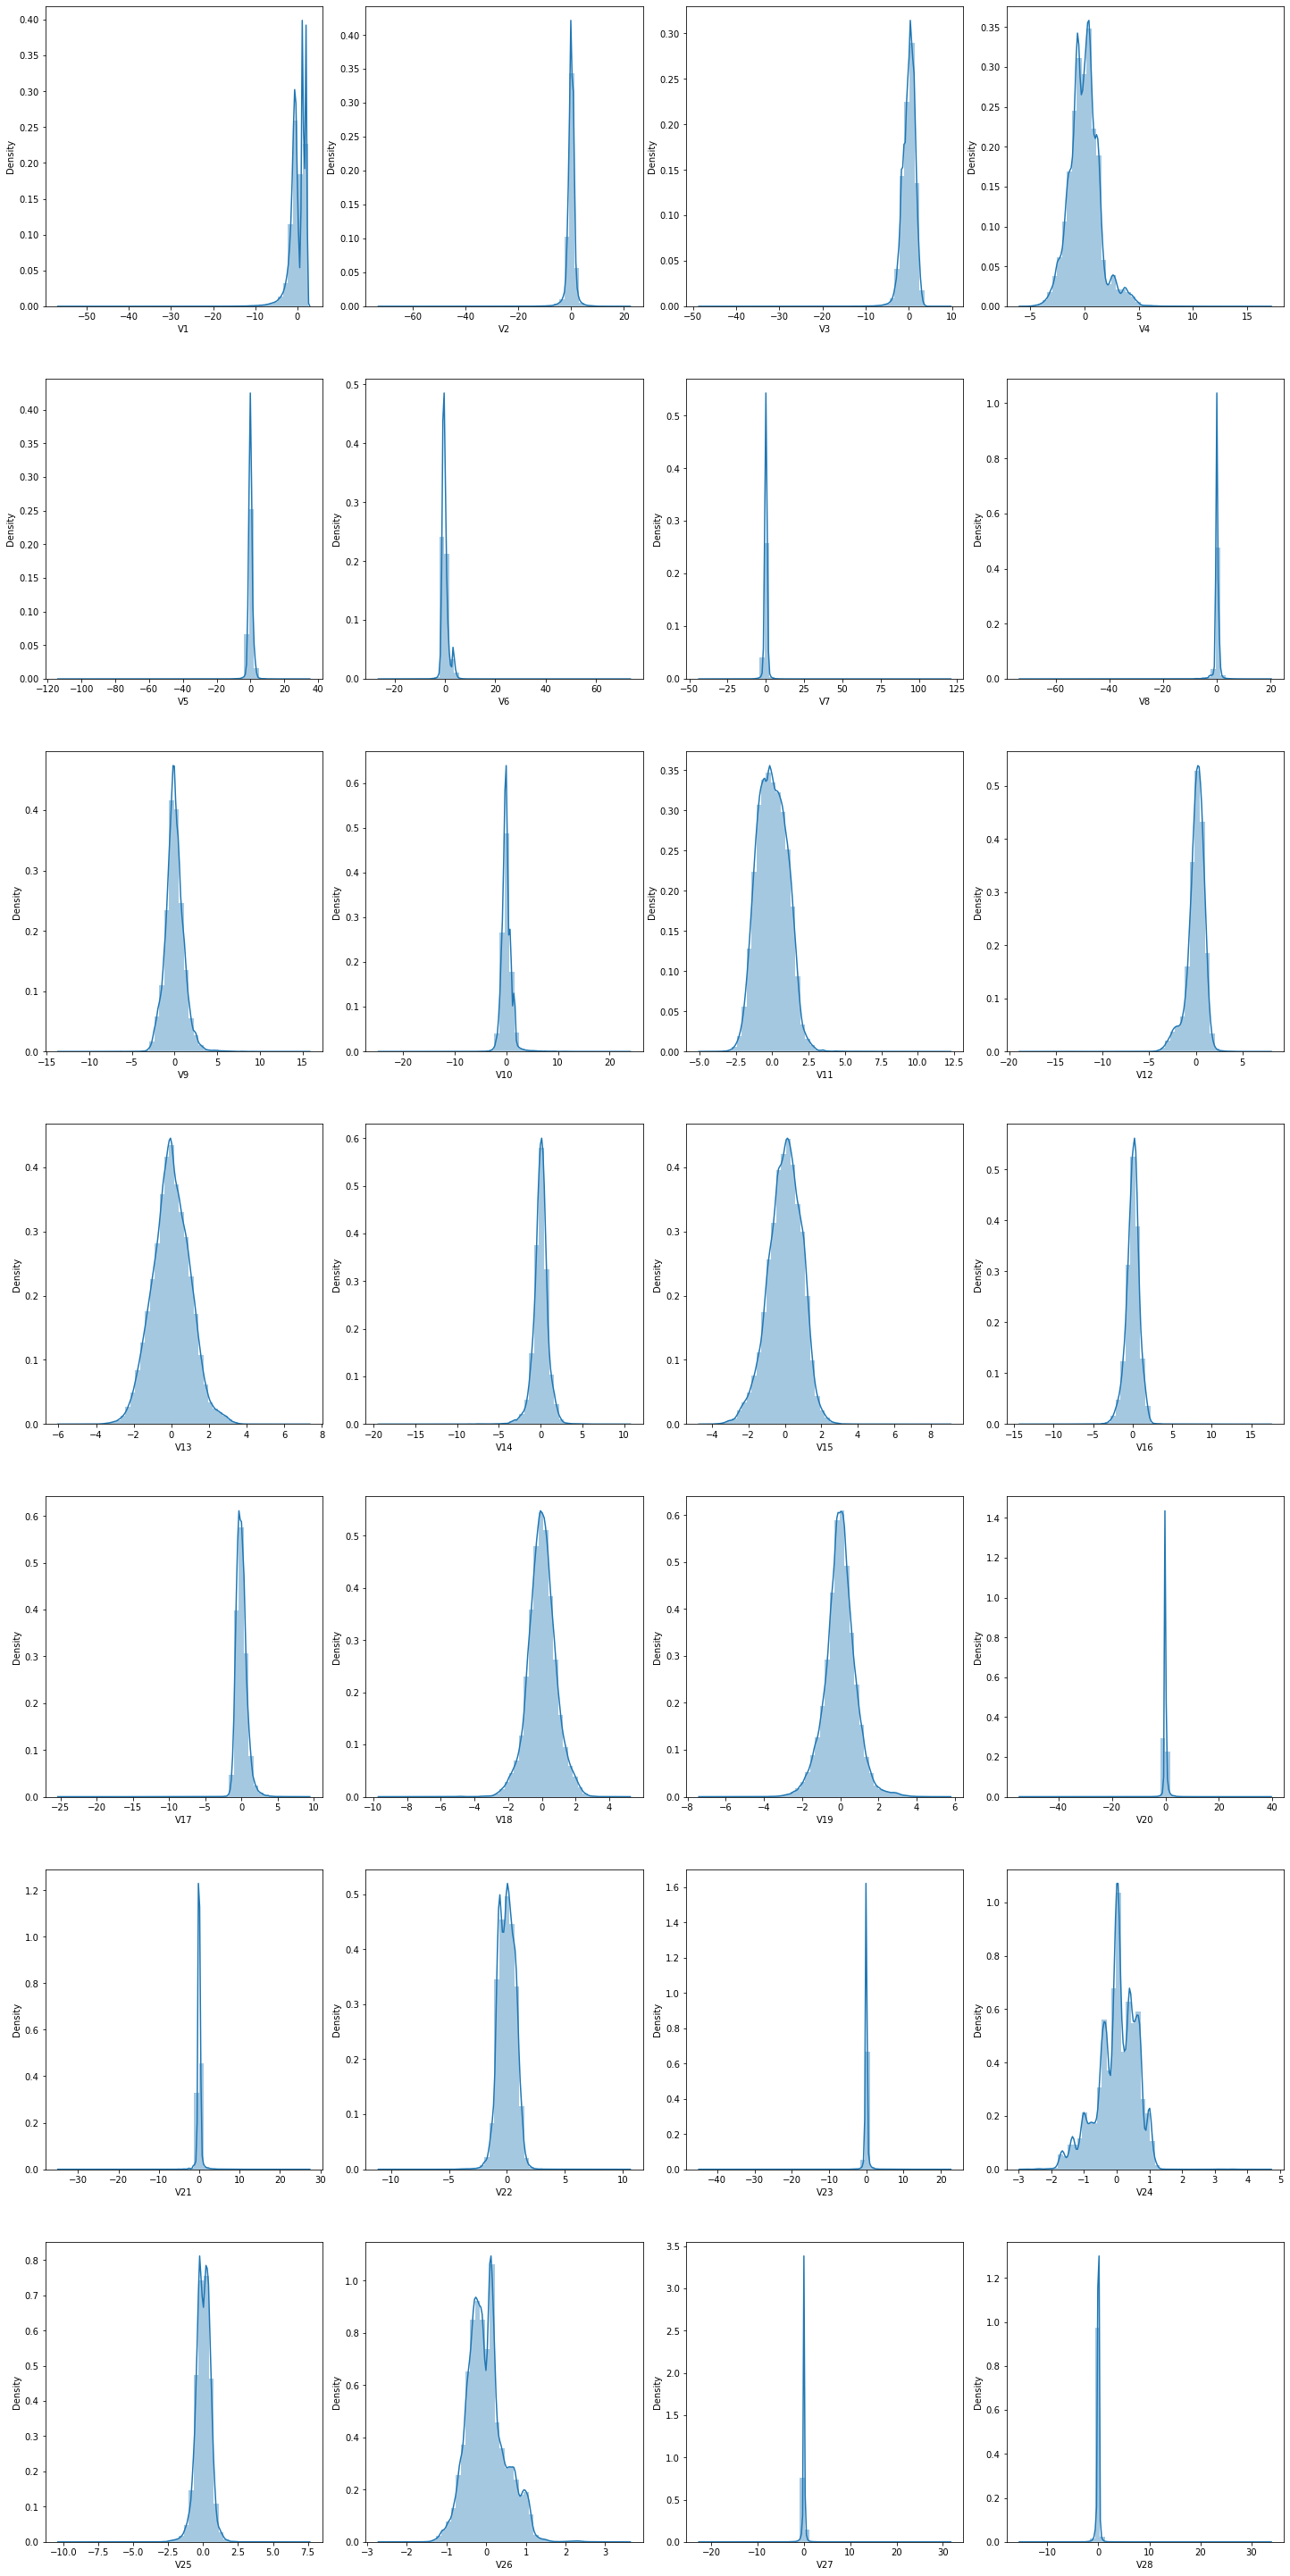

In [46]:
temp_df = df.drop(columns=['Time', 'Class', 'Amount'], axis=1)  # dropping the 3 columns

# create the plots
fig, ax = plt.subplots(ncols=4, nrows=7, # we have 28 rows. 7 x 4 = 28
                figsize=(20,40))
index = 0   # initializing the index to 0, to iterate through the columns
ax = ax.flatten()

for col in temp_df.columns:
    sns.distplot(temp_df[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.5, h_pad=5)

Most of our have a bell curve, which shows a uniform distribution of the data. This means we don't have to worry bout processing these features.

### Exploring the Time and Amount columns

<AxesSubplot:xlabel='Time', ylabel='Density'>

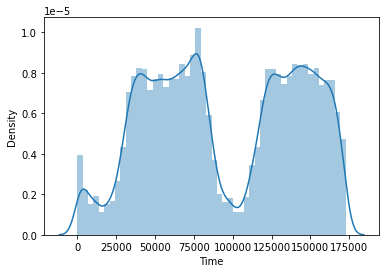

In [47]:
sns.distplot(df['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

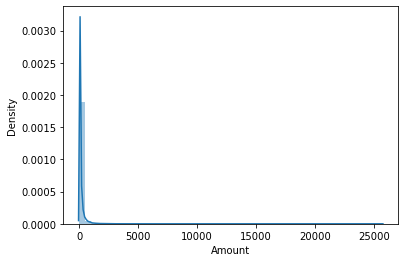

In [48]:
sns.distplot(df['Amount'])

The 2 columns above have uneven distribution. There is a huge difference between the values of the columns.

- Most of the amounts are less than ~300 Euros.

### Correlation Matrix

<AxesSubplot:>

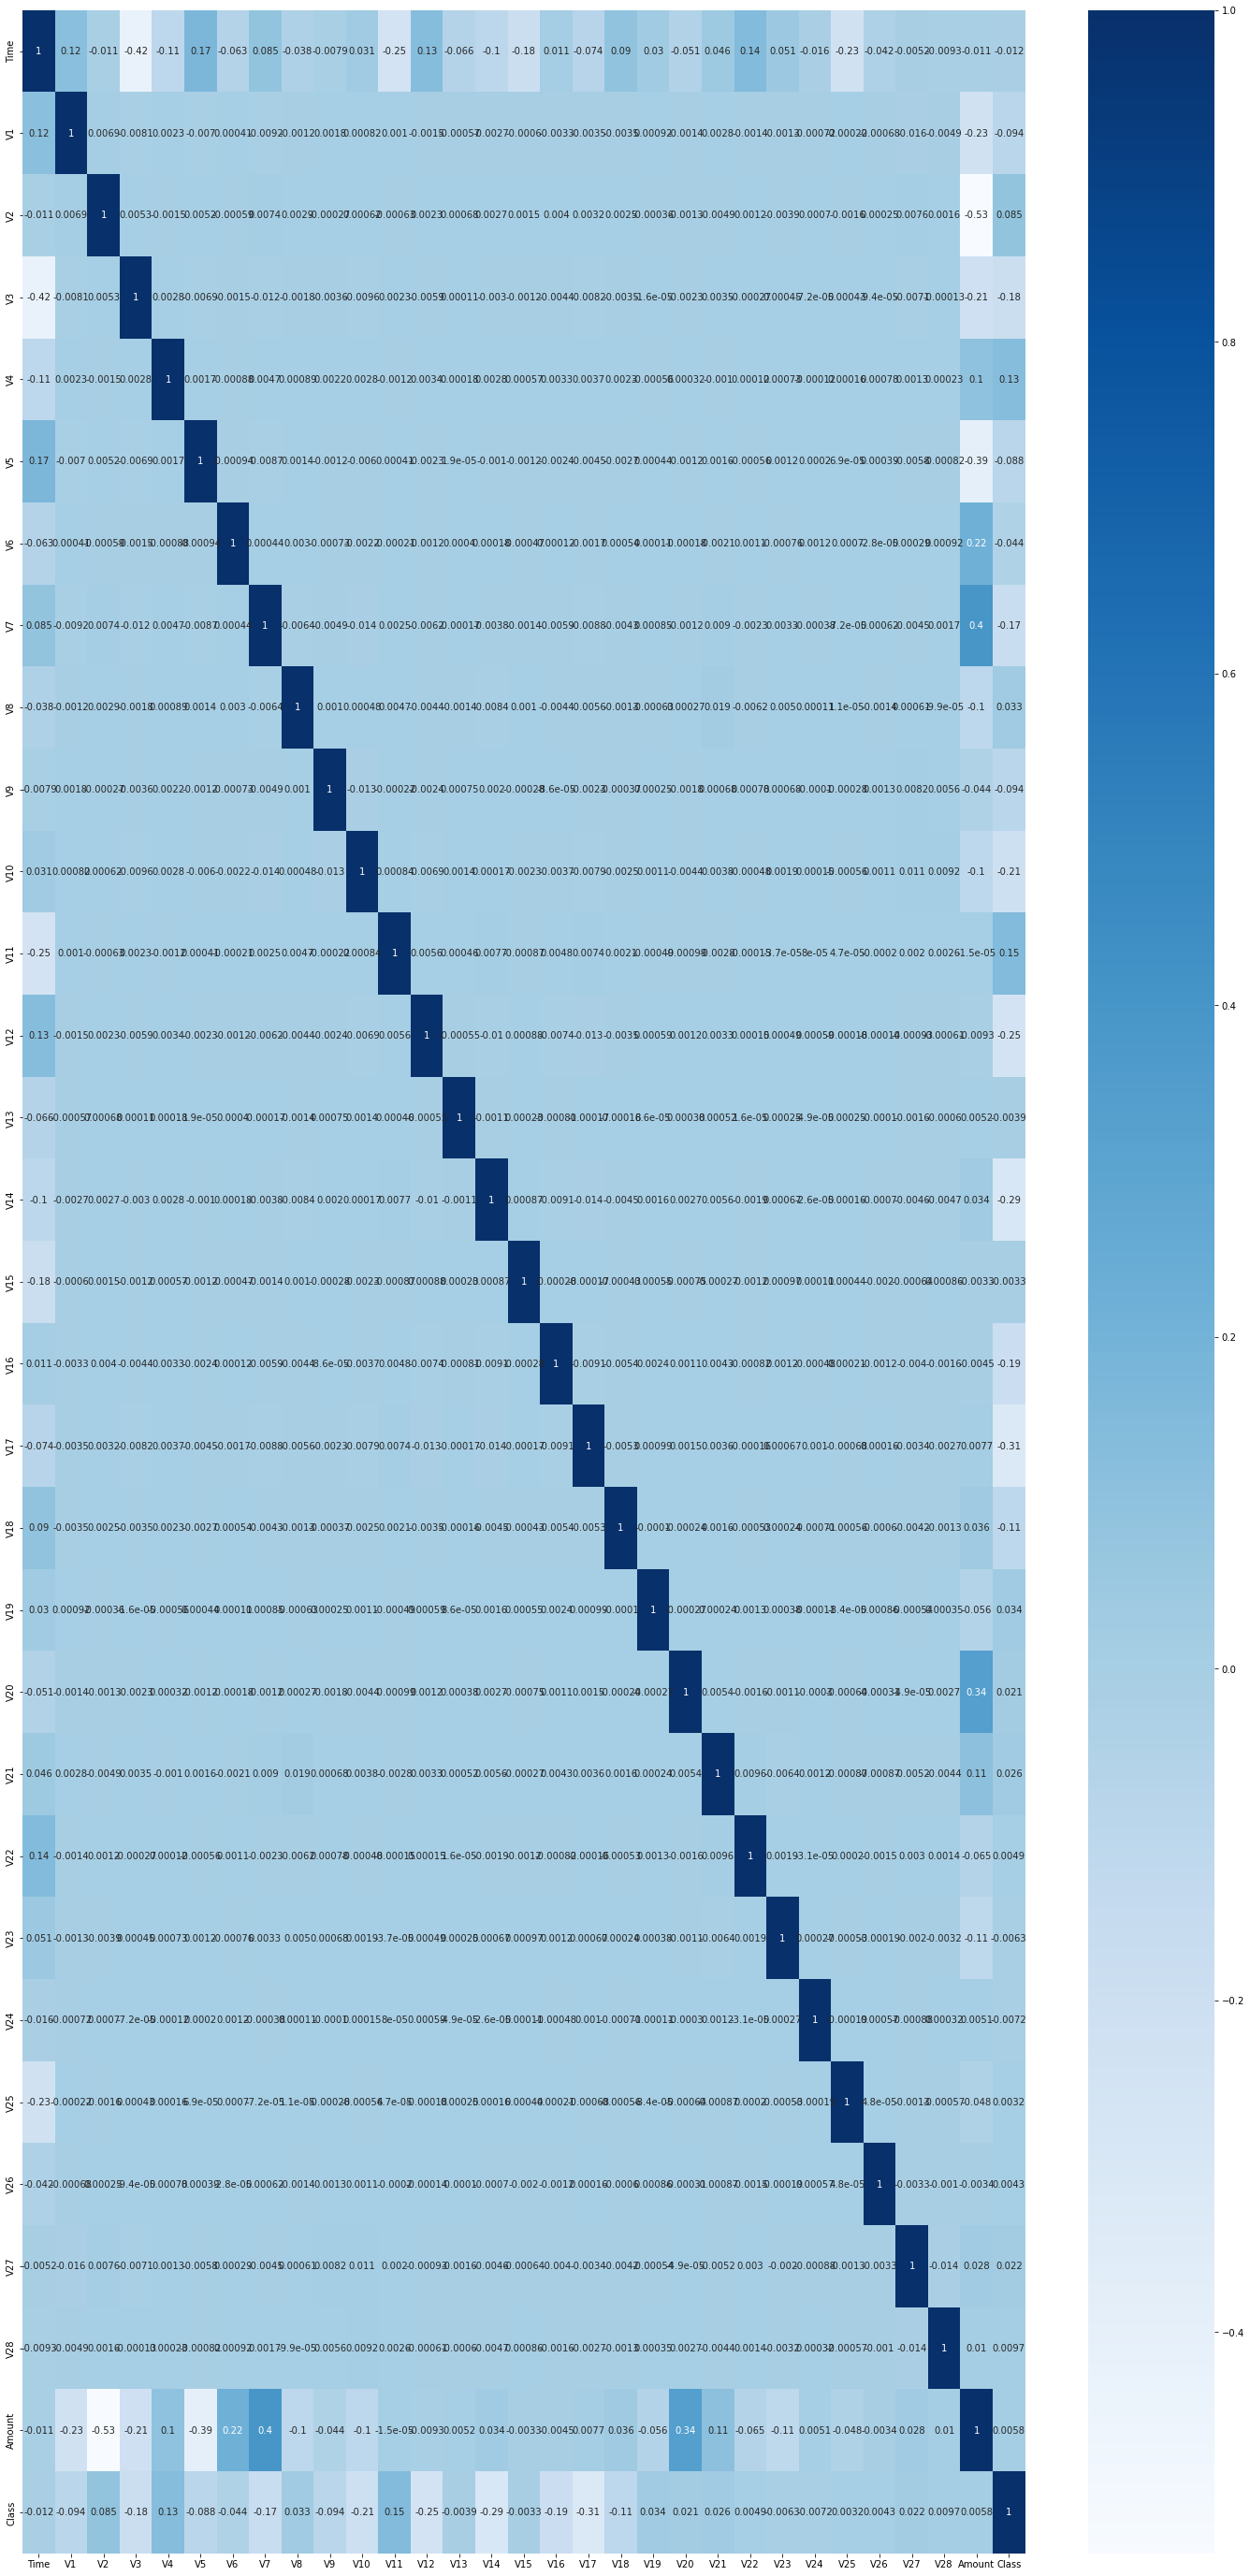

In [50]:
corr = df.corr()
plt.figure(figsize=(24,50))   # column size 20, row size 50
sns.heatmap(corr, annot=True, cmap='Blues')

From the heatmap, it is observed that columns such as V1, V2, V3, V5, V6, V7, and V20 have a high negative/positive correlation with the Amount column.

- So, these columns certainly capture some information related to the transaction amount.

We also see some correlation between the Time and V3 column, a negative correlation.

**What to do from here?** 
    We could drop some columns,this is where we could only keep the columns that have a strong positive or negative correlation with the response variable, Amount. For now let's proceed without dropping any.

### Feature Engineering

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

The data no longer has duplicate values.

In [21]:
#mean_value_of_columns = df.mean()
# #df = df.fillna(mean_value_of_columns, inplace=True)

# OR

#df = df.fillna(0)   # filling all nulls with 0
#df.mean()


# When using SMOTE, I get an error
# "AttributeError: 'NoneType' object has no attribute 'drop' "

# Here, I was trying to ensure that I do not have any null or missing

### Splitting the data

In [14]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

### Scaling the columns

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [16]:
x_scaled   # just to see the array that was created

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.18382429,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

The data now consists of scaled valued from aroun -2 to 2.

### Modeling

We will first model on the imbalanced data, then later deal with the imbalanced and then model again to compare the results.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,
                                    stratify=y,
                                    random_state=42)
# because the class is not balanced, we can randomly select the data,
# we'll just uniformly distribute the data using stratify


In [18]:
# creating the model
lr = LogisticRegression()  

#fitting the data into the model
lr.fit(X_train, y_train)

# testing
y_pred = lr.predict(X_test)

lr_report = classification_report(y_test, y_pred)
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



- The accuracy is 100% with this logistic regression model, but we can't go with the accuracy as majority are the non-fraudulent samples.
- Macro average F1 score is 0.84

In [60]:
f1_score(y_test, y_pred)

0.6875

We get an F1 score of 0.69, which is not good enough. This might be because of unbalanced dataset.
Let us now try other models.
- We will compare the models with this base model.

In [61]:
# creating the model
rf = RandomForestClassifier()  

#fitting the data into the model
rf.fit(X_train, y_train)

# testing
y_pred = rf.predict(X_test)

rf_report = classification_report(y_test, y_pred)
print(rf_report)
print("F1 score is: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

F1 score is:  0.8242424242424242


The random forest model gives a better F1 score of 0.82.

In [62]:
# Creating the XGBClassifier instance
clf = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# testing
y_pred = clf.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print(clf_report)
print("F1 score is: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.73      0.82        95

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

F1 score is:  0.8214285714285715


XGBClassifier gives a 0.8214 F1 score.

### NB: THE SECTION BELOW CONTAINS AN ERROR WHEN TRYING TO USE SMOTE, I HAVE NOT SOLVED THE ERROR YET. 

### Please SKIP to the part that says `CONTINUE FROM HERE`.

### Balancing the classes

Let us first visualize the distribution before making changes.

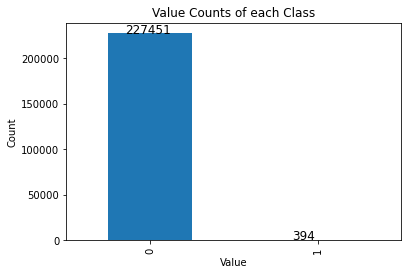

In [14]:
value_counts = y_train.value_counts()
# Plot the value counts as a bar chart
value_counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Counts of each Class')

# To show the actual value counts on the plot
for i in range(len(value_counts)):
    plt.text(x = i-0.15, y = value_counts[i]+0.5, s = value_counts[i], size = 12)

# Show the plot
plt.show()

We will now use the SMOTE method.

- We can either increase the data of the fraudulent transactions, or decrease the data of data non-fraudulent transactions, or a combination of both oversampling and undersampling.

In [50]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

(227845, 30)
(227845,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Converting y_train to an array. X_train is already an array.

In [20]:
y_train = y_train.values

Both are now arrays

In [51]:
# over_sample = SMOTE()
# x_smoted, y_smote = over_sample.fit_resample(X_train, y_train)

In [52]:
# from imbalanced_learn.over_sampling import SMOTE
# over_sample = SMOTE()
# x_smoted, y_smote = over_sample.fit_resample(X_train, y_train)

I tried solving the error above:

1. As we have seen in the EDA section, the data has no null values, no 'NoneType' objects.
2. I then `implicitely` filled missing values with the mean, and also with zero's, but still got the same error.

Through research, I have noticed that: 
- It's `possible` that the error is NOT related to the presence of null values in your dataframe, but instead to the type of your data. SMOTE is a technique for resampling a minority class in a classification problem, so you need to make sure that both X_train and y_train are arrays-like`(which I did)`, with y_train being a one-dimensional array-like object containing the target labels.

----------------------------------------------------------------------------

I continued getting this error, which suggests that the problem might not be with the type of y_train, but rather `with the SMOTE implementation that I am using`. The split() method is used to split a string into substrings based on a specified delimiter, but it seems that it is being called on an object of type NoneType, which is a type `representing the absence of a value`.

It's possible that there is a bug in the SMOTE implementation that you are using. I would suggest trying a different implementation of SMOTE, such as the one provided by the imbalanced-learn library:
!pip install -U imbalanced-learn (I tried installing it and it said requirement already satisfied, but when using it, i.e,  
`from imbalanced_learn.over_sampling import SMOTE`
`over_sampler = SMOTE()`
`x_smoted, y_smoted = over_sampler.fit_resample(X_train, y_train)`
(it says it is not defined)


I then looked for different implementations/variations of SMOTE, and found:
`Regular SMOTE`: This is the original implementation of SMOTE and it generates synthetic samples by interpolating between existing minority class samples.

`Borderline SMOTE`: This variation of SMOTE focuses on generating synthetic samples close to the decision boundary between the minority and majority classes.

`SVM-SMOTE`: This variation of SMOTE uses support vector machine (SVM) to generate synthetic samples by interpolating between existing minority class samples that are closest to the decision boundary.

`Adaptive Synthetic Sampling (ADASYN)`: This is a more recent method that generates synthetic samples in proportion to the density of the minority class samples. This method aims to balance the density of minority class samples in regions with high class imbalance and high misclassification cost.

`SMOTE-NC`: This is a variant of SMOTE that generates synthetic samples from the nearest centroids of minority class samples, rather than from individual minority class samples.

`Safe-level SMOTE`: This is a modification of SMOTE that takes into account the safe level of minority class samples in the feature space. This method generates synthetic samples that are similar to the minority class samples, but with a reduced risk of over-sampling noisy samples.

How to import them:
- Importing Regular SMOTE: 
from imbalanced_learn.over_sampling import SMOTE

- Importing Borderline SMOTE: 
from imbalanced_learn.over_sampling import BorderlineSMOTE

- Importing SVM-SMOTE: 
from imbalanced_learn.over_sampling import SVMSMOTE

- Importing Adaptive Synthetic Sampling (ADASYN): 
from imbalanced_learn.over_sampling import ADASYN

- Importing SMOTE-NC: 
from imbalanced_learn.over_sampling import SMOTENC

- Importing Safe-level SMOTE: 
from imbalanced_learn.over_sampling import SafeLevelSMOTE

I have tried implementing them, but this does not solve the problem.

# `CONTINUE FROM HERE`

### `Let us continue using Resampling Method`

In [19]:
from sklearn.utils import resample

In [20]:
# Separate minority and majority classes
not_default = df[df['Class']==0]
default = df[df['Class']==1]

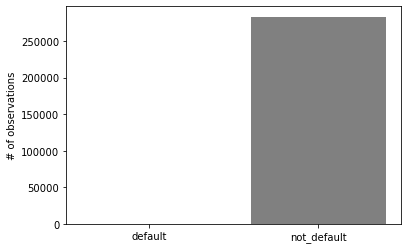

In [21]:
# Get all possible labels
labels = df['Class'].unique()
heights = [len(default),len(not_default)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['default','not_default'])
plt.ylabel("# of observations")
plt.show()

In [22]:
# Upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(not_default), # match number in minority class
                          random_state=27) # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([default_upsampled, not_default])

# Check new class counts
upsampled['Class'].value_counts()

1    283253
0    283253
Name: Class, dtype: int64

### Visualizing the upsampled class

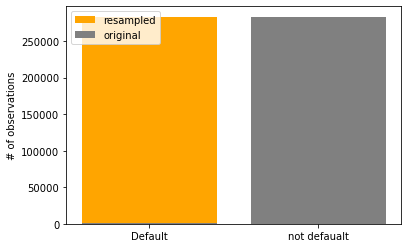

In [23]:
upsampled_heights = [len(upsampled[upsampled['Class']==0]),len(upsampled[upsampled['Class']==1])]

# Get all possible labels
labels = df['Class'].unique()
plt.bar(labels,upsampled_heights,color='orange')
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['Default','not defaualt'])
plt.ylabel("# of observations")
plt.legend(['resampled','original'])
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# we no longer need the stratify parameter since our class is balanced.

In [30]:
from imblearn.over_sampling import RandomOverSampler
# Use the RandomOverSampler method to balance the class distribution in the training data
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [28]:
# Fit a Random Forest classifier to the resampled data
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_resampled, y_resampled)

# Evaluate the performance of the classifier on the test data
y_pred = clf.predict(X_test)
clf_report = classification_report(y_test, y_pred)
print(clf_report)
print("F1 score is: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

F1 score is:  0.8354430379746834


We see an improved F1 score of 0.8354, as compared to the previous unbalanced random forest result of 0.8242.

At one time, it gave 0.8588.

In [32]:
# Creating the XGBClassifier instance
clf = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5)

# Fit the classifier to the training data
clf.fit(X_resampled, y_resampled)

# testing
y_pred = clf.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print(clf_report)
print("F1 score is: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.64      0.81      0.72        90

    accuracy                           1.00     56746
   macro avg       0.82      0.91      0.86     56746
weighted avg       1.00      1.00      1.00     56746

F1 score is:  0.7156862745098039


In [34]:
# Creating the XGBClassifier instance
clf = XGBClassifier(learning_rate=0.1, n_estimators=300, max_depth=5)

# Fit the classifier to the training data
clf.fit(X_resampled, y_resampled)

# testing
y_pred = clf.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print(clf_report)
print("F1 score is: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.93      0.78      0.85        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

F1 score is:  0.8484848484848485


The xgb classifier gives us a better F1 score 0f 0.8485.

High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels.

Saving the xgb model as a pickle file

In [38]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(clf, files)

### Conclusion

In this notebook, we aimed to develop a machine learning model for detecting fraudulent credit card transactions. The problem of credit card fraud is becoming increasingly prevalent and it is important to have an accurate and reliable system for detecting fraud in real-time.

A machine learning model can quickly identify any drifts from regular transactions and user behaviours in real time. By recognising anomalies, such as a sudden increase in transactional amount or location change, ML algorithms can minimise the risk of fraud and ensure more secure transactions.

We used a dataset of over 280,000 credit card transactions, which included information such as the amount, time, and location of each transaction. The data was highly imbalanced, with only 0.17% of transactions labeled as fraudulent.

We evaluated several machine learning models including logistic regression, random forest, and xgb classifier. We found that the xgb classifier performed the best with an accuracy of 84.84% on the testing data.

Our model was able to accurately detect fraud with a precision of 93% and a recall of 78%. These results indicate that our model is capable of detecting the majority of fraudulent transactions while minimizing the number of false positive alerts.

One limitation of our analysis is that the dataset only includes a small subset of all possible features that could be used to detect fraud. Furthermore, the oversampling technique used to balance the class distribution may have resulted in overfitting.

In conclusion, our xgb classifier provides a promising solution for detecting credit card fraud in real-time. However, the oversampling technique used to balance the class distribution may have resulted in overfitting. A more robust solution could be achieved by using both oversampling and undersampling techniques, which would better balance the class distribution while also reducing the risk of overfitting. Future work could include incorporating additional features and testing the model on a larger and more diverse dataset.  Additionally, further investigation into using a combination of oversampling and undersampling techniques could lead to even better results.

Next steps?

Try to keep columns that correlate to the transaction amount to see if there will be a better model performance or not.

### References

https://www.google.com/imgres?imgurl=https%3A%2F%2Fdataaspirant.com%2Fwp-content%2Fuploads%2F2020%2F09%2F3-Credit-Card-Fraud-Detection.png&imgrefurl=https%3A%2F%2Fdataaspirant.com%2Fcredit-card-fraud-detection-classification-algorithms-python%2F&tbnid=jImFe3DqlnruYM&vet=12ahUKEwiQmtCniYr9AhWKcKQEHaJ9AtAQMygVegUIARCMAg..i&docid=L97J6_ww8-_o6M&w=750&h=450&q=credit%20card%20fraud%20detection&client=firefox-b-d&ved=2ahUKEwiQmtCniYr9AhWKcKQEHaJ9AtAQMygVegUIARCMAg